# R054 - Archisha Sinha
## Domain: Reinforcement Learning
## Topic: SARSA and Q Learning


##Aim:  Q Learning and SARSA
a.	To implement Q Learning Algorithm in a complex grid world environment

b.	To implement SARSA Algorithm in a complex grid world environment

c.	To compare Q learning and SARSA Algorithm


## **Q Learning**
### **Update Rule for Q learning**

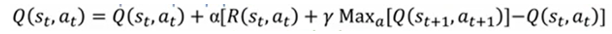


## **SARSA**
### **Update Rule for SARSA**

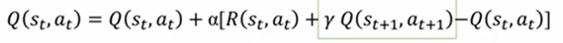


### **Problem Description**
The agent is placed in a 5x5 grid, where it needs to navigate from a start state to a goal state while avoiding obstacles and negative rewards. The agent receives a reward of +10 for reaching the goal state, a penalty of -1 for every move, and a penalty of -10 if it hits a wall. The agent can move in four directions: up, down, left, and right..


### Grid World Setup:
•	The grid has 25 states represented as S={S0,S1,...,S24}

•	The robot can move up, down, left, or right, but if it tries to move outside the grid boundaries, it remains in the same state.

•	The robot receives the following rewards:

-	+10 for reaching the goal state G

-	-10 for hitting an obstacle.

-	-1 for each step to discourage long paths.

The goal state is S4, and the start state is S20. Obstacles are placed in several states, and the robot must learn to avoid them.


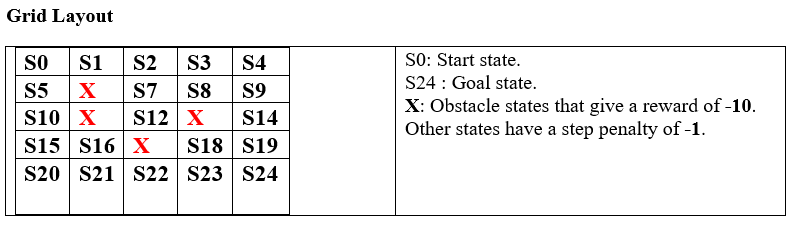

### Task to be completed:

Implement Q-Learning Algorithm:

-	Implement Q-learning with a simple tabular approach.
-	Train the agent in the environment using Q-learning.
-	Tune hyperparameters such as learning rate, discount factor, and exploration strategy (e.g., ε-greedy).
-	Store and update the Q-table during training.

Implement SARSA Algorithm:
-	Implement the SARSA algorithm (State-Action-Reward-State-Action).
-	Train the agent using SARSA.
-	Use similar hyperparameters for comparison with Q-learning.
-	Store and update the Q-table for SARSA during training.


In [1]:
import numpy as np
import random

### Initialize Environment and Q-table

In [2]:
# Environment settings
num_states = 25  # Total states from S0 to S24
goal_state = 24  # S24 is the goal
obstacles = [6, 11, 17, 17]  # States with obstacles
start_state = 0  # S0 is the start

# Q-table initialization
num_actions = 4  # Actions: 0=Up, 1=Right, 2=Down, 3=Left
Q = np.zeros((num_states, num_actions))

# Rewards
rewards = -np.ones(num_states)  # Step penalty of -1 for each state
rewards[goal_state] = 10  # Reward of +10 at the goal state
for obs in obstacles:
    rewards[obs] = -10  # Reward of -10 for obstacles


### Define Actions and Transitions

In [3]:
def get_next_state(state, action):
    # Define the next state based on the action
    row, col = divmod(state, 5)
    if action == 0 and row > 0:         # Up
        return state - 5
    elif action == 1 and col < 4:       # Right
        return state + 1
    elif action == 2 and row < 4:       # Down
        return state + 5
    elif action == 3 and col > 0:       # Left
        return state - 1
    return state  # No movement if hitting boundaries

### Q-Learning


In [5]:
# Q-table initialization for Q-Learning
Q_qlearning = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.1        # Learning rate
gamma = 0.9        # Discount factor
epsilon = 0.1      # Exploration factor
episodes = 1000    # Training episodes

for episode in range(episodes):
    state = start_state
    while state != goal_state:
        # ε-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(num_actions))  # Explore
        else:
            action = np.argmax(Q_qlearning[state])  # Exploit

        # Take action and observe reward and next state
        next_state = get_next_state(state, action)
        reward = rewards[next_state]

        # Q-Learning update
        Q_qlearning[state, action] = Q_qlearning[state, action] + alpha * (reward + gamma * np.max(Q_qlearning[next_state]) - Q_qlearning[state, action])

        state = next_state  # Move to the next state

print("Q-Table after Q-Learning:")
print(Q_qlearning)

Q-Table after Q-Learning:
[[ -1.6498801   -0.434062    -2.68602439  -1.53189358]
 [ -0.72847981   0.62882    -10.15421779  -1.45743082]
 [  0.20543829   1.8098       0.9479386   -0.68849256]
 [  1.54031682   1.50697441   3.122        0.50703396]
 [ -0.78371631  -0.77255306   4.12638173  -0.57269361]
 [ -1.54606286  -4.18812992  -2.8101858   -2.78263903]
 [ -0.45625324  -0.7765241   -2.68477905  -1.11642537]
 [ -0.86029085  -1.19721929   3.03137476  -4.27310745]
 [  1.17900496   4.01540673   4.58         0.95053705]
 [  0.50447776   1.18548992   6.19706124  -0.56283945]
 [ -2.17937769  -4.77437639  -2.09971984  -2.22178641]
 [ -1.           0.82495579  -0.46818352  -0.5870932 ]
 [ -0.58010459   4.57779026  -1.86946335  -4.11487053]
 [  2.77798675   6.2          5.50677849   2.66490193]
 [  4.01942361   5.7713772    8.           4.48139418]
 [ -1.50915055  -0.92401996  -1.4448416   -1.4754454 ]
 [ -2.74337423  -1.           1.06612195  -0.96227316]
 [  0.61726343  -0.1         -0.1      

## SARSA

In [6]:
# Reset Q-table for SARSA
Q_sarsa = np.zeros((num_states, num_actions))

for episode in range(episodes):
    state = start_state
    # ε-greedy action selection for the first action
    if random.uniform(0, 1) < epsilon:
        action = random.choice(range(num_actions))
    else:
        action = np.argmax(Q_sarsa[state])

    while state != goal_state:
        # Take action and observe reward and next state
        next_state = get_next_state(state, action)
        reward = rewards[next_state]

        # ε-greedy action selection for the next action
        if random.uniform(0, 1) < epsilon:
            next_action = random.choice(range(num_actions))
        else:
            next_action = np.argmax(Q_sarsa[next_state])

        # SARSA update
        Q_sarsa[state, action] = Q_sarsa[state, action] + alpha * (reward + gamma * Q_sarsa[next_state, next_action] - Q_sarsa[state, action])

        state = next_state  # Move to the next state
        action = next_action  # Update the action

print("\nQ-Table after SARSA:")
print(Q_sarsa)



Q-Table after SARSA:
[[-2.97166983 -1.64535938 -3.55966392 -2.724873  ]
 [-1.8624796  -0.21206807 -9.00215866 -2.74948005]
 [-0.51387795  1.38033015 -0.70357399 -1.78042452]
 [-0.43084573  0.27045006  2.75791895 -0.99938939]
 [-0.82275505 -0.83316765  3.39891634 -0.66724021]
 [-2.5631926  -5.6693164  -2.82307903 -3.09784393]
 [-0.85449495  0.90117477 -1.92323092 -0.72261348]
 [-0.8285265   2.4328211  -0.75222309 -8.70470762]
 [ 0.23182328  4.23641878  1.56090659  0.4706192 ]
 [ 1.03644679  3.16046793  6.00380551  1.76402309]
 [-2.33813871 -3.48555627 -2.2804655  -2.31893051]
 [-1.         -0.37724282 -0.36986515 -0.53422617]
 [-0.79719861  2.1220038  -1.90981    -1.        ]
 [-0.23531129  5.50649638 -0.09208301 -0.23183778]
 [ 2.77545925  5.3650994   7.51152828  3.02504014]
 [-1.63562832 -1.7642576  -1.61305965 -1.6168934 ]
 [-2.7271     -3.41076671 -0.56607114 -1.03147245]
 [-0.19981    -0.16736869  0.88764876 -0.26293129]
 [ 0.31523883  7.2393183   0.66760884 -2.70487019]
 [ 5.1540

## Conclusion:

Q-learning is an off-policy algorithm that tends to explore more as it updates Q-values based on the maximum possible future reward, making it more suitable for dynamic environments. SARSA, an on-policy algorithm, updates Q-values based on the actual action taken, which results in more conservative learning and can be safer in environments with high-risk states (like obstacles).